## Loading dataset

In [30]:
import pandas as pd
import glob

df = pd.concat(map(pd.read_csv, glob.glob("backblaze2019/2019-01*.csv")))
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.shape

(3314967, 129)

## Taking features

Filter by model ST12000NM0007

In [32]:
df2 = df
df = df[df['model'] == "ST12000NM0007"]
df.shape

(975204, 129)

In [33]:
df = df.filter(['date','serial_number','smart_5_raw', 'smart_187_raw', 'smart_197_raw', 'failure'])
df.shape

(975204, 6)

## Creating features

In [46]:
def create_features(g):
    # 5
    smart_5_shifted = g['smart_5_raw'].shift(fill_value=0)
    g['5_diff'] = g['smart_5_raw'] - smart_5_shifted
    #g.at[1, '5_diff'] = 0
    #g.ix[1, '5_diff'] = 0
    # 187
    smart_187_shifted = g['smart_187_raw'].shift(fill_value=0)
    g['187_diff'] = g['smart_187_raw'] - smart_187_shifted
    #g.at[1, '187_diff'] = 0
    #g.ix[1, '187_diff'] = 0
    # 197
    smart_197_shifted = g['smart_197_raw'].shift(fill_value=0)
    g['197_diff'] = g['smart_197_raw'] - smart_197_shifted
    #g.at[1, '197_diff'] = 0
    #g.ix[1, '197_diff'] = 0
    return g


#df = df.groupby(['serial_number'], group_keys=True).filter(lambda g: len(g['failure'].value_counts()) == 1
#                                                           # disk failed => check variance > 0
#                                                           or len(g['failure'].value_counts()) == 2
#                                                          and len(g['5_diff'].value_counts()) > 0
#                                                          and len(g['187_diff'].value_counts()) > 0
#                                                          and len(g['197_diff'].value_counts()) > 0)

#df1 = df1.reset_index()
df1 = df
df1 = df1.groupby(['serial_number'], group_keys=True, as_index=False).apply(lambda x: create_features(x))
df1.reset_index(drop=True, inplace=True)
df1.head(35)

,date,serial_number,smart_5_raw,smart_187_raw,smart_197_raw,failure,5_diff,187_diff,197_diff
0,2019-01-01,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2019-01-02,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2019-01-03,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2019-01-04,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
4,2019-01-05,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
5,2019-01-06,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
6,2019-01-07,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
7,2019-01-08,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
8,2019-01-09,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
9,2019-01-10,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0


In [47]:
df1['5_diff'].value_counts()

0.0       974049
8.0          226
16.0          71
1.0           57
32.0          38
           ...  
2416.0         1
2016.0         1
63.0           1
161.0          1
39.0           1
Name: 5_diff, Length: 259, dtype: int64

In [48]:
df1['187_diff'].value_counts()

0.0       974781
1.0           58
3.0           42
2.0           24
4.0           11
6.0            8
7.0            5
9.0            4
12.0           3
15.0           2
5.0            2
22.0           2
14.0           2
26.0           1
38.0           1
16.0           1
1723.0         1
18.0           1
35.0           1
11.0           1
95.0           1
21.0           1
54.0           1
8.0            1
13.0           1
94.0           1
28.0           1
Name: 187_diff, dtype: int64

In [49]:
df1['197_diff'].value_counts()

 0.0      974744
 8.0         118
 16.0         30
-8.0          19
 24.0         10
 32.0          8
-16.0          5
 40.0          4
 88.0          3
 96.0          3
-32.0          2
 72.0          2
 112.0         2
 56.0          2
 152.0         1
 128.0         1
 64.0          1
 48.0          1
 80.0          1
 120.0         1
Name: 197_diff, dtype: int64

## Dataset preprocessing

1. Removing duplicates

In [56]:
df1.shape

(975204, 9)

In [57]:
df1.drop_duplicates()

,date,serial_number,smart_5_raw,smart_187_raw,smart_197_raw,failure,5_diff,187_diff,197_diff
0,2019-01-01,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2019-01-02,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2019-01-03,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2019-01-04,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
4,2019-01-05,ZCH00XGL,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
975199,2019-01-27,ZJV2VATD,0.0,0.0,0.0,0,0.0,0.0,0.0
975200,2019-01-28,ZJV2VATD,0.0,0.0,0.0,0,0.0,0.0,0.0
975201,2019-01-29,ZJV2VATD,0.0,0.0,0.0,0,0.0,0.0,0.0
975202,2019-01-30,ZJV2VATD,0.0,0.0,0.0,0,0.0,0.0,0.0


In [58]:
df1.shape

(975204, 9)

2. Removing empty rows -- did it in previous section

In [59]:
df1 = df1.dropna()
df1.shape

(974958, 9)

3. Check for each disk whether the values are complete. This means that for a working disk, the last sample must match the last day of the dataset, and for a failed disk, the last sample in the failure feature must contain a value of 1. If these conditions are not met, all samples from that disk will be removed from the dataset.

In [60]:
df1['serial_number'].value_counts()

ZCH00XGL    31
ZJV03K9N    31
ZJV03KHW    31
ZJV03KHV    31
ZJV03KHQ    31
            ..
ZJV2EFDA     1
ZJV2ENZ6     1
ZJV2E9XX     1
ZCH0CSJ9     1
ZJV2ECEV     1
Name: serial_number, Length: 32407, dtype: int64

4.  For each failed hard disk, check if it has a variance greater than 0 in its features. If not, the hard disk will be removed from the dataset.

In [61]:
df1.shape

(974958, 9)

## Split data

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


#df1 = df1[df1['date'] == "2018-01-01"]
#df1.shape

#df1['serial_number_int'] = pd.Categorical(df1['serial_number']).codes
#df1.head()
X = df1.drop(['failure','date','serial_number'], axis=1)
y = df1['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

y_train.value_counts()

0    731181
1        37
Name: failure, dtype: int64

## Creating model

In [85]:
from sklearn.ensemble import IsolationForest

IF_FDR = IsolationForest(contamination=0.01)

IF_FAR = IsolationForest(contamination=0.0002)

In [86]:
IF_FDR.fit(X_train.values)
IF_FAR.fit(X_train.values)

IsolationForest(contamination=0.0002)

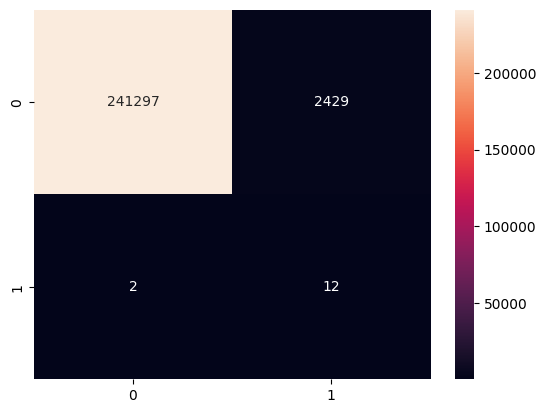

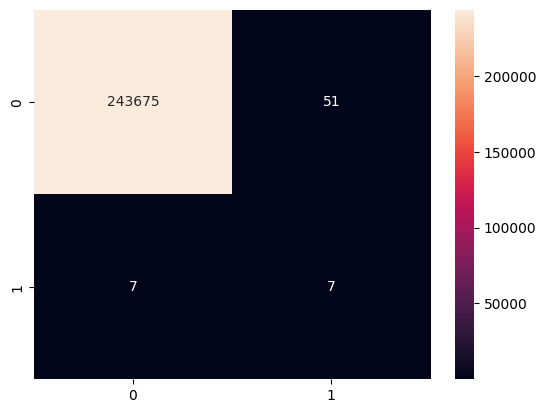

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def map_function(elem):
    if elem == -1:
        return 1
    else:
        return 0

y_pred_test = IF_FDR.predict(X_test.values)
y_pred_test = [map_function(a) for a in y_pred_test]
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.show()

y_pred_test_far = IF_FAR.predict(X_test.values)
y_pred_test_far = [map_function(a) for a in y_pred_test_far]
sns.heatmap(confusion_matrix(y_test, y_pred_test_far), annot=True, fmt='.0f')
plt.show()


In [100]:
pd.DataFrame(y_pred_test).value_counts()

0    241299
1      2441
dtype: int64

## Cross-validation

In [102]:
from sklearn import model_selection
# tuning IF_FDR
param_grid = {'n_estimators': [1000, 1500], 
              'max_samples': [10], 
              'contamination': [0.01, 0.02, 0.03, 0.04, 0.05], 
              'max_features': [10, 15], 
              'bootstrap': [True], 
              'n_jobs': [-1]}

grid_search = model_selection.GridSearchCV(IF_FAR, 
                                           param_grid,
                                           scoring="neg_mean_squared_error", 
                                           refit=True,
                                           cv=100, 
                                           return_train_score=True)
grid_search.fit(X_train.values, y_train)

best_model = grid_search.fit(X_train, y_train)
print('Optimum parameters', best_model.best_params_)

ValueError: 
All the 2000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_iforest.py", line 306, in fit
    super()._fit(
  File "C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py", line 382, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]
